In [ ]:
!pip install darts

In [4]:
import numpy as np
import pandas as pd
from darts import TimeSeries
import matplotlib.pyplot as plt
import statsmodels.api as sm


Un modelo MA está dado por: $X_t = \mu + \varepsilon_t + \theta_1 \varepsilon_{t-1} + \theta_2 \varepsilon_{t-2} + \dots + \theta_q \varepsilon_{t-q}$, donde $\varepsilon_t \sim N(0, \sigma^2)$


El modelo ARMA(p,q) se define generalmente como:

$$
X_t = c + \varepsilon_t + \sum_{i=1}^{p} \phi_i X_{t-i} + \sum_{j=1}^{q} \theta_j \varepsilon_{t-j}
$$

Donde $ \varepsilon_t $ es un ruido blanco.
Lo anterior es equivalente a:

$$
X_t + \sum_{i=1}^{p} (-\phi_i) X_{t-i} = c + \varepsilon_t + \sum_{j=1}^{q} \theta_j \varepsilon_{t-j}
$$

Cuando implementamos este modelo usando arma\_generate\_sample, los coeficientes AR y MA se definen de la siguiente manera:

$$
AR = [1, -\phi_1, -\phi_2, \ldots, -\phi_p]
$$

$$
MA = [1, \theta_1, \theta_2, \ldots, \theta_q]
$$

El primer término de cada lista (el "1") es simplemente una convención en statsmodels y no se refiere a un coeficiente real en la ecuación ARMA.

Por eso, para un modelo ARMA(0,2) (que es esencialmente un modelo MA(2) sin términos AR), definimos ar = [1] (sin términos AR) y ma con tres valores, donde el primero es 1 y los otros dos son los coeficientes MA.


In [5]:


# Simular datos MA(2) = ARMA(0,2)
np.random.seed(0)
ar = np.array([1])  # Sin Terminos AR
ma = np.array([1, 0.5, -0.3])  # MA
simulated_data = sm.tsa.arma_generate_sample(ar=ar, ma=ma, nsample=1000)


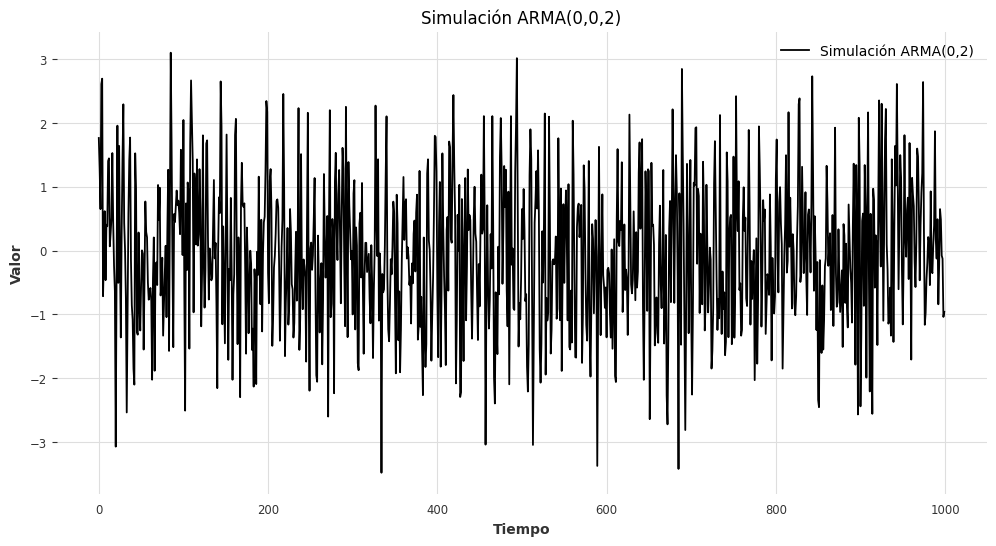

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(simulated_data, label='Simulación ARMA(0,2)')
plt.legend()
plt.title("Simulación ARMA(0,0,2)")
plt.xlabel("Tiempo")
plt.ylabel("Valor")
plt.show()

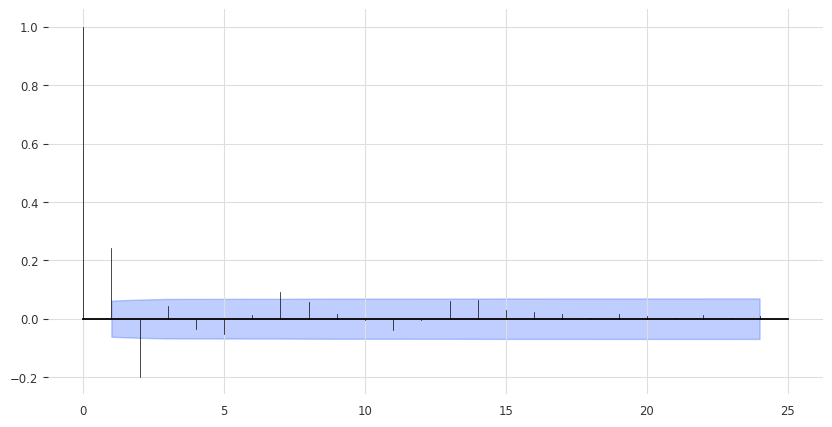

In [43]:
time_index = pd.date_range(start="2023-01-01", periods=1000, freq='D')

# Convertir los datos simulados a una serie de tiempo de Darts
simulated_series_darts = TimeSeries.from_times_and_values(time_index, simulated_data)

# Graficar la función de autocorrelación usando Darts
from darts.utils.statistics import plot_acf

plot_acf(simulated_series_darts)

Para un modelo MA(2) son

$$\rho_1 = \frac{\theta_1+\theta_1 \theta_2}{1 + \theta_1^2 + \theta_2^2}
$$
$$\rho_2 = \frac{\theta_2}{1 + \theta_1^2 + \theta_2^2}$$

que en este caso para $\theta_1 = 0.5$ y $\theta_2 = -0.3$ se obtiene que $\rho_1 \approx 0.2612$ y $\rho_2 ≈ -0.2239$

In [34]:
from darts.models import ARIMA
model = ARIMA(p=0, d=0, q=2)
model.fit(simulated_series_darts)

ARIMA(p=0, d=0, q=2, seasonal_order=(0, 0, 0, 0), trend=None, random_state=None, add_encoders=None)

In [39]:
underlying_model = model.model

# Obtener y mostrar los parámetros estimados
estimated_params = underlying_model.params
print(estimated_params)

[-0.05446993  0.49672612 -0.33240131  0.97129637]
